In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3677102310730590469
]


In [2]:
!pip install keras

You should consider upgrading via the 'c:\users\paul\anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils import np_utils, plot_model, to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist

In [4]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.2,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.5,1.5]
)
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
datagen.fit(x_train)
datagen.fit(x_test)
x_train = x_train.reshape(60000, 28 * 28)
x_test = x_test.reshape(10000, 28 * 28)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


60000 train samples
10000 test samples


In [5]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [6]:
model = Sequential()
model.add(Dense(1024, input_shape=(28*28,), activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              803840    
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total params: 1,863,690
Trainable params: 1,863,690
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [8]:
batch_size = 128
num_classes = 10
epochs = 10
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 11s 23ms/step - loss: 0.3436 - accuracy: 0.8969 - val_loss: 0.0938 - val_accuracy: 0.9703
Epoch 2/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0676 - accuracy: 0.9784 - val_loss: 0.0763 - val_accuracy: 0.9737
Epoch 3/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0401 - accuracy: 0.9873 - val_loss: 0.0656 - val_accuracy: 0.9808
Epoch 4/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0339 - accuracy: 0.9886 - val_loss: 0.0740 - val_accuracy: 0.9793
Epoch 5/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0209 - accuracy: 0.9935 - val_loss: 0.0688 - val_accuracy: 0.9798
Epoch 6/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0197 - accuracy: 0.9942 - val_loss: 0.0580 - val_accuracy: 0.9828
Epoch 7/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0166 - accuracy: 0.9942 - val_loss: 0.1105 - val_accuracy: 0.

Prediction result: 0


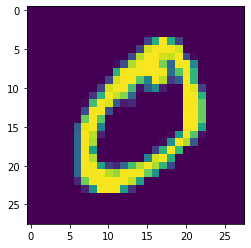

In [9]:
plt.imshow(x_train[1].reshape(28,28))
print('Prediction result: {}'.format(np.argmax(model.predict(x_train[1].reshape(1, 28 * 28)))))

Prediction result: 5


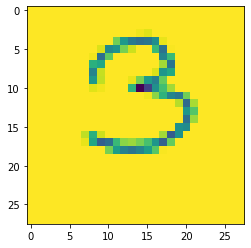

In [10]:
img = np.array(Image.open('3.png').resize((28,28)).convert('L')).astype('float32')
img[img <= 50] = 0
img /= 255.0

plt.imshow(img)
img = img.reshape(1, 28 * 28)
print('Prediction result: {}'.format(np.argmax(model.predict(img))))